In [3]:
import requests
from datetime import date, timedelta
import pandas as pd

url = "https://api.coingecko.com/api/v3/coins/bitcoin/history?date="

headers = {
    "accept": "application/json",
    "x-cg-demo-api-key": "CG-XNGBRE1zynSYLPRSQhjN7n2v"
}


def daterange(start_date: date, end_date: date):
    days = int((end_date - start_date).days)
    for n in range(days):
        yield start_date + timedelta(n)

start_date = date(2025, 4, 1)
end_date = date(2025, 4, 14)
res = []
for single_date in daterange(start_date, end_date):
    response = requests.get(url + single_date.strftime("%d-%m-%Y") + "&localization=false", headers=headers)
    data = response.json()
    res.append({
        "date" : single_date, 
        "price" : data["market_data"]["current_price"]["usd"], 
        "total volume" : data["market_data"]["total_volume"]["usd"],
        "market cap" : data["market_data"]["market_cap"]["usd"]})

df = pd.DataFrame(res)

print(df)


          date         price  total volume    market cap
0   2025-04-01  82514.093654  3.032615e+10  1.635077e+12
1   2025-04-02  85237.587605  2.917290e+10  1.690602e+12
2   2025-04-03  82526.422153  4.633291e+10  1.637359e+12
3   2025-04-04  83163.987574  3.659446e+10  1.652537e+12
4   2025-04-05  83852.007654  3.564729e+10  1.664235e+12
5   2025-04-06  83595.885502  1.491040e+10  1.656020e+12
6   2025-04-07  78211.483582  3.614038e+10  1.555325e+12
7   2025-04-08  79179.292268  8.290975e+10  1.581408e+12
8   2025-04-09  76329.090356  4.781279e+10  1.515042e+12
9   2025-04-10  82622.170295  8.740822e+10  1.640568e+12
10  2025-04-11  79596.357323  4.121352e+10  1.580023e+12
11  2025-04-12  83439.288180  3.981357e+10  1.655869e+12
12  2025-04-13  85305.097284  2.242893e+10  1.693601e+12


{'prices': [[1744988629491, 84541.69566568747], [1744992370557, 84382.34027186113], [1744996046835, 84455.82994619277], [1744999491703, 84543.02354629472], [1745003028592, 84599.59333023877], [1745006854135, 84535.96965601825], [1745010295138, 84495.66839467015], [1745013896604, 84589.93551188768], [1745017449563, 84507.5553544359], [1745021090927, 84447.77718147618], [1745024692944, 84430.13416891031], [1745028293988, 84537.56876723397], [1745031879291, 84750.96113857607], [1745035494282, 84873.33303095314], [1745039096887, 85039.73101895596], [1745042815197, 85065.22675131068], [1745046568012, 84928.93649119227], [1745049878713, 85188.51899516837], [1745053487420, 85315.77967080926], [1745057097504, 85348.12052038811], [1745060691582, 85222.96773135632], [1745064278460, 85196.3572478893], [1745067652596, 85277.07094440877], [1745071479991, 85450.83762577904], [1745075366840, 85405.39779525725], [1745078694075, 85216.9255110766], [1745082288535, 84884.07476220753], [1745085887543, 851

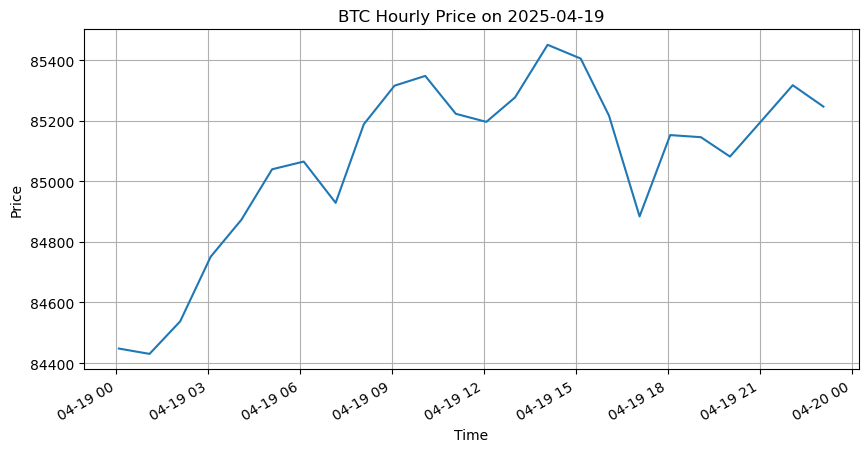

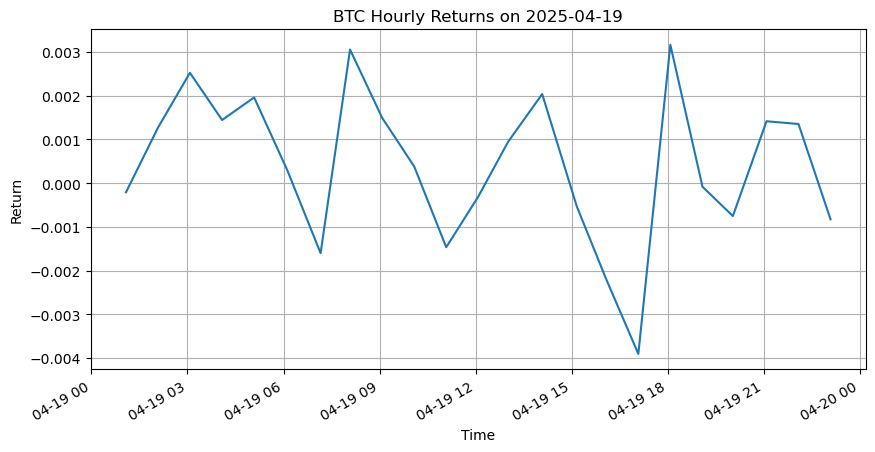

Votatility or Standard Deviation for 24h : 0.001749


In [ ]:
import matplotlib.pyplot as plt

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"

params = {
    'vs_currency' : 'usd',
    'days' : '2', # set 2 days to analyse actually only one to escape error about free version
}

headers = {
    "accept": "application/json",
    "x-cg-demo-api-key": "CG-XNGBRE1zynSYLPRSQhjN7n2v"
}

response = requests.get(url, params=params, headers=headers)
data = response.json()
print(data)
prices = pd.DataFrame(data['prices'],columns=['timestamp','price']) 

prices['timestamp'] = pd.to_datetime(prices['timestamp'], unit = 'ms')
prices.set_index('timestamp', inplace = True)

day_to_analyse = pd.to_datetime('2025-04-19') # set one date
next_day = day_to_analyse + pd.Timedelta(days=1) # set the second day
prices = prices[(prices.index >= day_to_analyse) & (prices.index < next_day)] # extract only one of these to to analyse one day hourly(default)

prices['return'] = prices['price'].pct_change() # calculate the percentage change from hour to hour (returns)

volatility = prices['return'].std() # calculate standard deviation of these returns (volatility)

print(prices)
print(f'Volatility of Bitcoin for last 24 hours:{volatility:.4f}')

prices['price'].plot(title=f'BTC Hourly Price on {day_to_analyse.date()}', figsize=(10,5))  # visualising price
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.show()

prices['return'].plot(title=f'BTC Hourly Returns on {day_to_analyse.date()}',figsize=(10,5)) #visualising returns
plt.xlabel('Time')
plt.ylabel('Return')
plt.grid(True)
plt.show()
print(f'Votatility or Standard Deviation for 24h : {volatility:4f}')

